## ECE588 - Coursera Optional Assignments Week 1

Author - Alex Bzdel <div>
Email - alex.bzdel@duke.edu


## Imports and Data Preprocessing

In [2]:
import numpy as np
import random
from PIL import Image, ImageOps
from copy import copy, deepcopy

## Prompt #2
Using  any programming language you feel comfortable with (it is though  recommended to use the provided free Matlab), load an image and then  perform a simple spatial 3x3 average of image pixels. In other words,  replace the value of every pixel by the average of the values in its 3x3  neighborhood. If the pixel is located at (0,0), this means averaging  the values of the pixels at the positions (-1,1), (0,1), (1,1), (-1,0),  (0,0), (1,0), (-1,-1), (0,-1), and (1,-1). Be careful with pixels at the  image boundaries. Repeat the process for a 10x10 neighborhood and again  for a 20x20 neighborhood. Observe what happens to the image (we will  discuss this in more details in the very near future, about week 3).

In [3]:
class Picture():
    """
    Picture class will hold information about an image.
    Does not currently support finding 4-neighborhoods.

    """

    # only original image link being passed into the constructor for now
    def __init__(self, original_image): # path to image as mandatory parameter to the constructor
        self.image = Image.open(original_image)
        self.image = ImageOps.grayscale(self.image) # we only want grayscale (can adapt this to change later on)
        self.image_matrix = np.array(self.image)
        
        # determine ranges we will need to iterate through
        # subtracting 1 because Python uses 0-based indexing
        self.x_range = self.image_matrix.shape[0] - 1
        self.y_range = self.image_matrix.shape[1] - 1

        # init cur_x and cur_y to be 0
        # will adjust these parameters to find various neighborhoods of the image
        self.cur_x = 0
        self.cur_y = 0

        # upper and lower bounds - will help us find how far we should look for a neighborhood of a pixel
        self.cur_lower_bound = 0
        self.cur_upper_bound = 0

        # temporary lists to hold a given index's current neighbors and current neighbor values
        self.cur_neighbors = []
        self.cur_vals = []

        # our average values from a pixel's neighbors
        self.cur_avg = 0

    def spatial_average(self, k):
        """
        Final function that loops through picture's values and places their averages in new_image.

            Parameters:
                k (int): range of values we want around our pixel (KxK box)

            Returns:
                new_image (2D NumPy array): Matrix representation of our blurred image

        """
        new_image = deepcopy(self.image_matrix)

        for y in range(self.y_range):
            for x in range(self.x_range):
                self.cur_x = x
                self.cur_y = y

                self.find_coord_vals(k)
                self.find_neighborhood_average(k)

                # overwrite our new_image index with our average from its original neighborhood
                new_image[x][y] = self.cur_avg

                # call reset values function at every iteration to ensure no accidental duplication
                self.reset_values()

        return new_image

    def find_neighborhood_average(self, k): self.cur_avg = np.mean(self.cur_vals)

    def find_coord_vals(self, k):
        """
        Given a pixel's neighbors, this function finds the values associated at each index and stores them in self.cur_vals.
        """
        self.find_coords(k)

        for i in self.cur_neighbors:
            if self.checks(i[0], i[1]): # call check function
                self.cur_vals.append(self.image_matrix[i[0]][i[1]])

    def find_coords(self, k):
        """
        Finds a KxK neighborhood around a given point.
        """

        # call our find_bounds function to know which pixels are in our neighborhood
        self.find_bounds(k)

        # iterate through each element of our x range
        for i in range(self.cur_x - self.cur_lower_bound, self.cur_x + self.cur_upper_bound):
            # iterate through each element of our y range
            for j in range(self.cur_y - self.cur_lower_bound, self.cur_y + self.cur_upper_bound):
                # iterate through y values
                # we should be able to iterate through the entire neighborhood of a pixel (size of which is defined by the tunable k value)
                # append current neighbor values - will be passed into a non-implemented function later
                self.cur_neighbors.append([i, j])

    def find_bounds(self, k):
        """
        Finds the amount we have to add and subtract by in order to iterate through our entire neighborhood.
        """
        self.cur_lower_bound = int(np.floor(k/2))
        self.cur_upper_bound = int(np.floor(k/2) + 1)


    def checks(self, x, y):
        """
        Performs tests to ensure the edges of the image are captured correctly.
        """
        if x < 0 or x > self.x_range:
            return False
        if y < 0 or y > self.y_range:
            return False

        return True


    def reset_values(self):
        self.cur_neighbors = []
        self.cur_vals = []

### Testing original image vs. blurred images

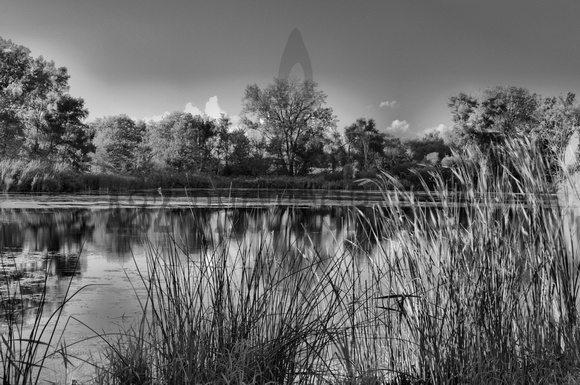

In [5]:
orig_image = Picture('p1872766193-3.jpg')
orig_image.image

In [8]:
# testing functions
five_neighbors = orig_image.spatial_average(5)
ten_neighbors = orig_image.spatial_average(10)
twenty_neighbors = orig_image.spatial_average(20)

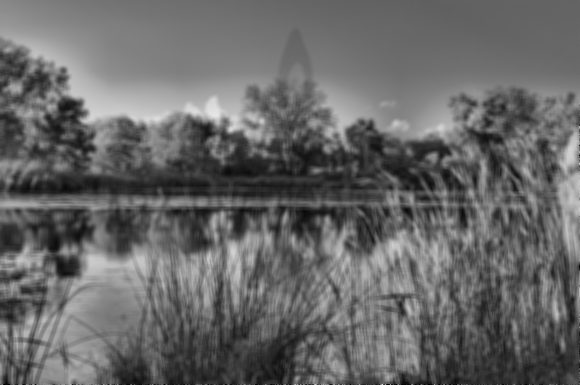

In [9]:
# 5 neighbors
Image.fromarray(np.uint8(five_neighbors))

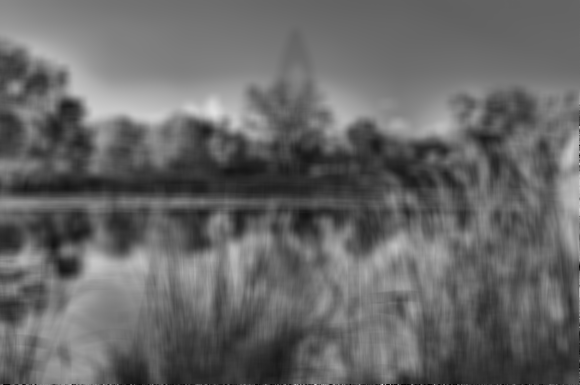

In [10]:
# ten neighbors
Image.fromarray(np.uint8(ten_neighbors))

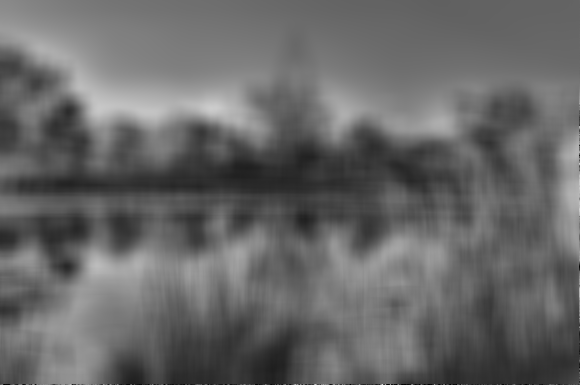

In [11]:
# twenty neighbors
Image.fromarray(np.uint8(twenty_neighbors))

### Conclusion

As we increase the number of neighbors, our image gets blurrier. We also lose more of the edges of the image (particularly in the bottom and the right), however this may be due to a bug in the code caused by me not knowing how to handle an even number of neighbors (eg. in a 4x4, 6x6, 10x10 matrix, there is no center point, so where do we look for our pixels?)


## Step 3: Rotate Image

Rotate the image by 45 and 90 degrees (Matlab provides simple command lines for doing this).

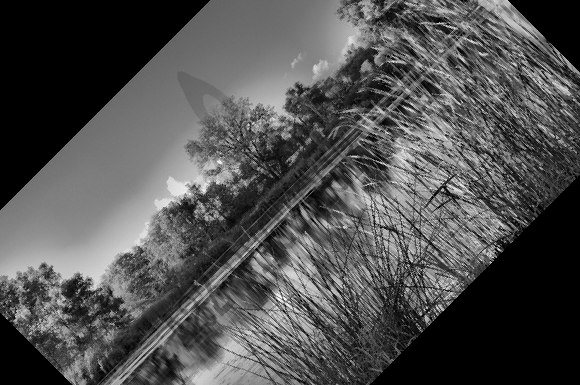

In [14]:
# rotate image by 45 degrees
orig_image.image.rotate(45)

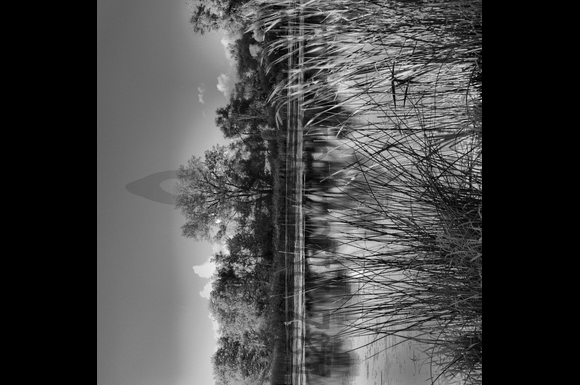

In [15]:
# rotate image by 90 degrees
orig_image.image.rotate(90)

## Step 4: Reduce Image Spatial Resolution

For  every 3 3×3 block of the image (without overlapping), replace  all corresponding 9 pixels by their average. This operation simulates  reducing the image spatial resolution. Repeat this for 5x5 and 7x7 blocks. If you are using Matlab, investigate  simple command lines to do this important operation.

In [16]:
class PictureStepThree(Picture):
    """
    Subclass of Picture. Adds additional functionality needed for step 3 of this assignment.

    """

    def segment_image(self, k):
        """ 
        Segments image into KxK blocks - all to be replaced by the average of each pixel
        """

        


SyntaxError: EOF while scanning triple-quoted string literal (Temp/ipykernel_14312/3922115671.py, line 4)